##**Домашнее задание по теме "AB-тесты"**

**Задание:**

Описание задачи
Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.). Профессор Оук является изобретателем Pokedex - портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

Описание набора данных

Профессор Оук скопировал все содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

pid: Numeric - ID покемона
HP: Numeric - Очки здоровья
Attack: Numeric - Сила обычной атаки
Defense: Numeric - Сила обычной защиты
Sp. Atk: Numeric - Сила специальной атаки
Sp. Def: Numeric - Сила специальной защиты
Speed: Numeric - Скорость движений
Legendary: Boolean - «True», если покемон редкий
Class 1: Categorical - Класс покемона
Class 2: Categorical - Класс покемона
Задание 1
Профессор Оук подозревает, что покемоны в классе Grass имеют более сильную обычную атаку, чем покемоны в классе Rock. Проверьте, прав ли он, и убедите его в своём выводе статистически.
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

Задание 2
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос, а правда ли, что покемоны в классе Water в среднем быстрее, чем покемоны в классе Normal.
Проверьте, прав ли он, и убедите его в своём выводе статистически.
Примечание: если есть покемоны, которые относятся к обоим классам, выбросьте их;
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

Задание 3
Профессор Оук тот еще безумец. Он изобрёл сыворотку, способную ускорить покемона. Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив treathed_pokemon. Проверьте, работает ли вообще его сыворотка, убедите всех в своём выводе статистически.
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

Задание 4
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик HP,Attack,Defense у легендарных покемонов выше, чем у других покемонов?
А произведение этих же параметров?
Найдите ответы на эти вопросы и убедите всех в своём выводе статистически.
Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

Задание 5
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боёв Оук выделил четыре класса best_defence_class, которые на его взгляд одинаковы по “силе обычной защиты” Defense.
Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Всё та же статистика вам в помощь!
Вы можете предположить, что распределение параметров защитных характеристик является нормальным для всех классов покемонов.



### Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex - портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

### Описание набора данных
Профессор Оук скопировал все содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

**Решение:**

In [ ]:
import warnings
# Отключение предупреждений (warnings)
warnings.filterwarnings("ignore")

import pandas as pd

from scipy.stats import ttest_ind
from scipy.stats import f_oneway, shapiro

pokemon = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv', on_bad_lines='skip')  # Откроем датасет
pokemon.head()

# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


### Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `Grass` имеют более сильную обычную атаку, чем покемоны в классе `Rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>

In [ ]:
# Фильтрация по условиям
filtered_pokemon = pokemon[(pokemon['Class 1'].isin(['Grass', 'Rock'])) & (pokemon['Class 2'].isnull())]

# Отбор нужных строк
grass_pokemon = filtered_pokemon[filtered_pokemon['Class 1'] == 'Grass']['Attack']
rock_pokemon = filtered_pokemon[filtered_pokemon['Class 1'] == 'Rock']['Attack']

# Вывод статистики для переменной grass_pokemon
print('Статистика для обычной атаки покемонов из класса Grass:')
print(grass_pokemon.describe())

# Вывод статистики для переменной rock_pokemon
print('\nСтатистика для обычной атаки покемонов из класса Rock:')
print(rock_pokemon.describe())

Статистика для обычной атаки покемонов из класса Grass:
count     33.000000
mean      68.818182
std       22.302543
min       30.000000
25%       53.000000
50%       65.000000
75%       85.000000
max      110.000000
Name: Attack, dtype: float64

Статистика для обычной атаки покемонов из класса Rock:
count      9.000000
mean     103.333333
std       35.443617
min       45.000000
25%       80.000000
50%      100.000000
75%      125.000000
max      165.000000
Name: Attack, dtype: float64


Статистика показывает, что средняя обычная атака у покемонов из класса Grass равна 68.82, в то время как у покемонов из класса Rock - 103.33. Однако стандартное отклонение у второго класса значительно выше: 35,44 против 22,30. Поэтому обратимся к другим статистическим методам для уточнения результата.

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

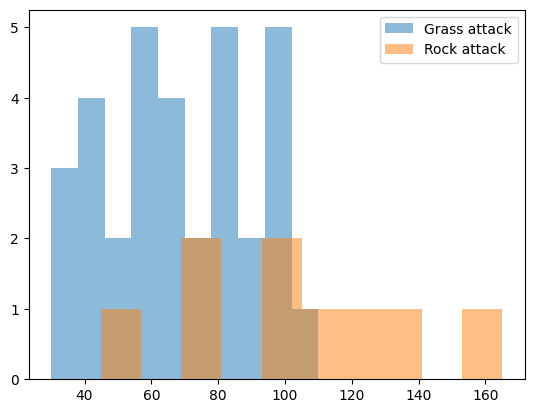

Покемоны класса Rock имеют более сильную обычную атаку, чем покемоны в класса Grass.

Stat: -3.60232780765211
p: 0.0008620463823202559


In [ ]:
# Оценка различия в атаке
stat, p = stats.ttest_ind(grass_pokemon, rock_pokemon)
alpha = 0.05

# Визуализация результатов
plt.hist(grass_pokemon, alpha=0.5, label='Grass attack')
plt.hist(rock_pokemon, alpha=0.5, label='Rock attack')
plt.legend()
plt.show()

if p < alpha:
    if stat < 0:
        print('Покемоны класса Rock имеют более сильную обычную атаку, чем покемоны в класса Grass.')
    else:
        print('Покемоны класса Grass имеют более сильную обычную атаку, чем покемоны в класса Rock')
else:
    print('Нет статистически значимых различий в обычной атаке между покемонами классов Grass и Rock.')

print('\nStat:', stat)
print('p:', p)

В результате проведенного t-теста выяснилось, что есть статистически значимая разница в обычной атаке между покемонами класса Grass и Roc. В среднем покемоны класса Grass имеют более слабую обычную атаку по сравнению с покемонами класса Rock.

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос, а правда ли, что покемоны в классе `Water` в среднем быстрее, чем покемоны в классе `Normal`.
    
    
Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание: если есть покемоны, которые относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.
</div>

In [ ]:
# Фильтрация по условиям
filtered_pokemon = pokemon[(pokemon['Class 1'].isin(['Water', 'Normal'])) & (pokemon['Class 2'].isnull())]

# Отбор нужных строк
water_pokemon = filtered_pokemon[filtered_pokemon['Class 1'] == 'Water']['Speed']
normal_pokemon = filtered_pokemon[filtered_pokemon['Class 1'] == 'Normal']['Speed']

# Вывод статистики для переменной water_pokemon
print('Статистика для скорости покемонов из класса Water:')
print(water_pokemon.describe())

# Вывод статистики для переменной normal_pokemon
print('\nСтатистика для скорости покемонов из класса Normal:')
print(normal_pokemon.describe())

Статистика для скорости покемонов из класса Water:
count     59.000000
mean      67.881356
std       19.930988
min       32.000000
25%       52.000000
50%       65.000000
75%       85.000000
max      115.000000
Name: Speed, dtype: float64

Статистика для скорости покемонов из класса Normal:
count     61.000000
mean      69.459016
std       28.191946
min        5.000000
25%       50.000000
50%       70.000000
75%       90.000000
max      120.000000
Name: Speed, dtype: float64


Мы видим, что класс Water имеет меньшее стандартное отклонение (19.93), чем класс Normal (28.19). Однако, средняя скорость покемонов класса Normal (69.45) выше, чем у покемонов из класса Water (67.881356).

Для проверки статистической значимости различий в средней скорости между покемонами из классов Water и Normal, воспользуемся t-тестом Стьюдента для независимых выборок.

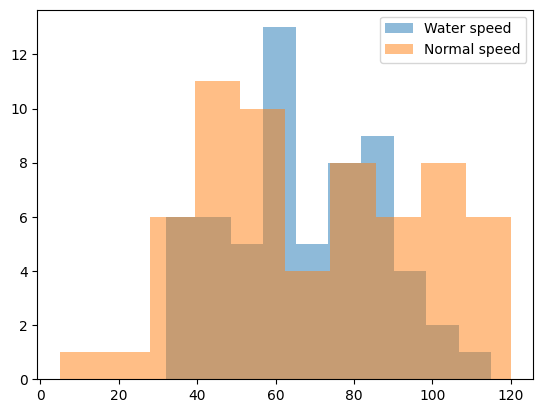

Нет статистически значимой разницы в скорости между покемонами класса Water и класса Normal
stat: -0.35290779696814856
p: 0.7247871854890613


In [ ]:
# Оценка различия в скорости
stat, p = stats.ttest_ind(water_pokemon, normal_pokemon)
alpha = 0.05

# Визуализация результатов
plt.hist(water_pokemon, alpha=0.5, label='Water speed')
plt.hist(normal_pokemon, alpha=0.5, label='Normal speed')
plt.legend()
plt.show()

if p < alpha:
    if stat < 0:
        print('Покемоны класса Normal двигаются быстрее, чем покемоны в класса Water')
    else:
        print('окемоны класса Water двигаются быстрее, чем покемоны в класса Normal')
else:
    print('Нет статистически значимой разницы в скорости между покемонами класса Water и класса Normal')

print('stat:', stat)
print('p:', p)

Исходя из результатов t-теста, статистика равна -0.353, что говорит о том, что покемоны в классе Water имеют немного меньшую среднюю скорость по сравнению с покемонами в классе Normal. Однако, значение p-value равно 0.725, что говорит о том, что разница не является статистически значимой.

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрёл сыворотку, способную ускорить покемона. Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своём выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

In [ ]:
# Вычисляем средние скорости в выборках
mean_treathed = pokemon.loc[pokemon['Name'].isin(treathed_pokemon), 'Speed'].mean()
mean_non_treathed = pokemon.loc[~pokemon['Name'].isin(treathed_pokemon), 'Speed'].mean()

# T-Test для сравнения средних скоростей
t_statistic, p_value = stats.ttest_ind(pokemon.loc[pokemon['Name'].isin(treathed_pokemon), 'Speed'],
                                       pokemon.loc[~pokemon['Name'].isin(treathed_pokemon), 'Speed'])

# Выводим базовые статистики
print("Базовые статистики для покемонов, принявших сыворотку:")
print(pokemon.loc[pokemon['Name'].isin(treathed_pokemon), 'Speed'].describe())

print("\nБазовые статистики для остальных покемонов:")
print(pokemon.loc[~pokemon['Name'].isin(treathed_pokemon), 'Speed'].describe())

print("\nРезультаты T-теста:")
print("t-статистика:", t_statistic)
print("p-значение:", p_value)

# Сравнение средних скоростей с выводом результата
alpha = 0.05
if p_value < alpha:
    if t_statistic < 0:
        print('\nПокемоны, не принимавшие сыворотку, в среднем двигаются быстрее, чем покемоны, которые ее приняли')
    else:
        print('\nПокемоны, принявшие сыворотку, в среднем двигаются быстрее, чем остальные покемоны')
else:
    print('\nНет статистически значимой разницы в скорости между покемонами, принявшими сыворотку, и остальными покемонами')

Базовые статистики для покемонов, принявших сыворотку:
count      4.000000
mean     145.000000
std        7.071068
min      135.000000
25%      142.500000
50%      147.500000
75%      150.000000
max      150.000000
Name: Speed, dtype: float64

Базовые статистики для остальных покемонов:
count    796.000000
mean      67.891960
std       28.614785
min        5.000000
25%       45.000000
50%       65.000000
75%       90.000000
max      180.000000
Name: Speed, dtype: float64

Результаты T-теста:
t-статистика: 5.385407401082377
p-значение: 9.51510117630786e-08

Покемоны, принявшие сыворотку, в среднем двигаются быстрее, чем остальные покемоны


Результаты T-теста показывают, что t-статистика равна 5.38, а p-значение (0.00000010) значительно меньше заданного уровня значимости 0.05. Поэтому мы можем отвергнуть нулевую гипотезу о равенстве средних скоростей двух групп покемонов. И, таким образом, сделать вывод, что покемоны, принявшие сыворотку, в среднем двигаются значительно быстрее, чем остальные покемоны.

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов?

А произведение этих же параметров?

Найдите ответы на эти вопросы и убедите всех в своём выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
# Фильтрация по условиям
legendary = pokemon[pokemon['Legendary'] == True]
non_legendary = pokemon[pokemon['Legendary'] == False]

# Вычислим сумму и произведение характеристик HP, Attack и Defense для каждой группы
legendary_sum = legendary['HP'] + legendary['Attack'] + legendary['Defense']
non_legendary_sum = non_legendary['HP'] + non_legendary['Attack'] + non_legendary['Defense']

legendary_comp = legendary['HP'] * legendary['Attack'] * legendary['Defense']
non_legendary_comp = non_legendary['HP'] * non_legendary['Attack'] * non_legendary['Defense']

In [ ]:
# Проведем T-тест для суммы характеристик
t_statistic_sum, p_value_sum = stats.ttest_ind(legendary_sum, non_legendary_sum)

# Проведем T-тест для произведения характеристик
t_statistic_comp, p_value_comp = stats.ttest_ind(legendary_comp, non_legendary_comp)

print("Результаты T-теста для суммы характеристик:")
print("T-статистика:", t_statistic_sum)
print("p-значение:", p_value_sum)

print("\nРезультаты T-теста для произведения характеристик:")
print("T-статистика:", t_statistic_comp)
print("p-значение:", p_value_comp)

alpha = 0.05
if p_value_sum < alpha:
    if t_statistic_sum < 0:
        print('\nЛегендарные покемоны в среднем имеют меньшую сумму характеристик по сравнению с другими покемонами')
    else:
        print('\nЛегендарные покемоны в среднем имеют большую сумму характеристик по сравнению с другими покемонами')
else:
    print('\nНет статистически значимой разницы в сумме характеристик между легендарными и другими покемонами')

if p_value_comp < alpha:
    if t_statistic_comp < 0:
        print('\nЛегендарные покемоны в среднем имеют меньшее произведение характеристик по сравнению с другими покемонами')
    else:
        print('\nЛегендарные покемоны в среднем имеют большее произведение характеристик по сравнению с другими покемонами')
else:
    print('\nНет статистически значимой разницы в произведении характеристик между легендарными и другими покемонами')


# Выводим базовые статистики для суммы характеристик
print("\nБазовые статистики для суммы характеристик:")
print("Легендарные покемоны:", legendary_sum.describe())
print("\nДругие покемоны:", non_legendary_sum.describe())

# Выводим базовые статистики для произведения характеристик
print("\nБазовые статистики для произведения характеристик:")
print("Легендарные покемоны:", legendary_comp.describe())
print("\nДругие покемоны:", non_legendary_comp.describe())

Результаты T-теста для суммы характеристик:
T-статистика: 11.591852366462316
p-значение: 7.970942205722087e-29

Результаты T-теста для произведения характеристик:
T-статистика: 13.263253408231844
p-значение: 1.992664308842282e-36

Легендарные покемоны в среднем имеют большую сумму характеристик по сравнению с другими покемонами

Легендарные покемоны в среднем имеют большее произведение характеристик по сравнению с другими покемонами

Базовые статистики для суммы характеристик:
Легендарные покемоны: count     65.000000
mean     309.076923
std       46.429822
min      230.000000
25%      275.000000
50%      305.000000
75%      340.000000
max      440.000000
dtype: float64

Другие покемоны: count    735.000000
mean     214.410884
std       64.359599
min       55.000000
25%      165.000000
50%      213.000000
75%      258.000000
max      440.000000
dtype: float64

Базовые статистики для произведения характеристик:
Легендарные покемоны: count    6.500000e+01
mean     1.085942e+06
std      5

Из результатов T-теста видно, что для обоих параметров (сумма и произведение характеристик) p-значение меньше заданного уровня значимости alpha, что говорит о статистически значимой разнице между легендарными и другими покемонами.

Для суммы характеристик, T-статистика равна 11.59, что говорит о том, что легендарные покемоны в среднем имеют большую сумму характеристик по сравнению с другими покемонами.

Для произведения характеристик, T-статистика равна 13.26, что также указывает на то, что легендарные покемоны в среднем имеют большее произведение характеристик по сравнению с другими покемонами.

Данные выводы подтверждаются и различием в средних суммах характеристик (309,08 против 214,41) и в средних произведениях (1,085,942 против 425,041).

Делаем вывод, что легендарные покемоны в среднем имеют выше и сумму, и произведение характеристик по сравнению с другими покемонами.

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боёв Оук выделил четыре класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`.

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Всё та же статистика вам в помощь!
   

Вы можете предположить, что распределение параметров защитных характеристик является нормальным для всех классов покемонов.

</div>

In [ ]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, 80 to 789
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rock    44 non-null     float64
 1   Ground  32 non-null     float64
 2   Steel   27 non-null     float64
 3   Ice     24 non-null     float64
dtypes: float64(4)
memory usage: 5.0 KB


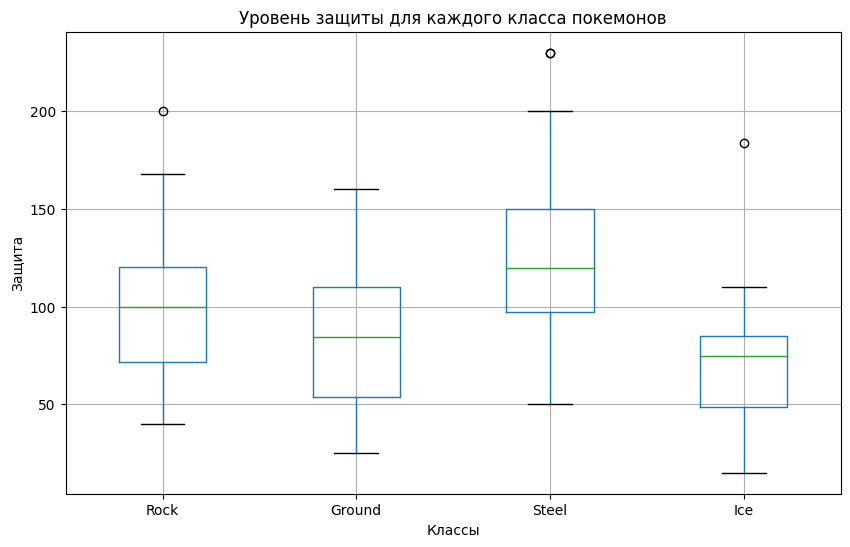

F-статистика: 10.576882027817977
p-значение: 3.0803014649204294e-06

Есть статистически значимые различия между классами по уровню защиты.


In [ ]:
# Создаем пустой список для хранения подвыборок
class_samples = []

# Создаем подвыборки для каждого класса покемонов
for class_name in best_defence_class:
    class_pokemon = pokemon.loc[pokemon['Class 1'] == class_name]
    class_samples.append(class_pokemon['Defense'])

# Создаем матрицу данных из списка подвыборок
data = pd.DataFrame(class_samples).T
data.columns = best_defence_class
data.info()

# Создаем boxplot
plt.figure(figsize=(10, 6))
data.boxplot()
plt.title('Уровень защиты для каждого класса покемонов')
plt.ylabel('Защита')
plt.xlabel('Классы')
plt.show()

# Проводим однофакторный ANOVA-тест
f_statistic, p_value = f_oneway(*class_samples)

# Выводим значения F-статистики и p-значения
print("F-статистика:", f_statistic)
print("p-значение:", p_value)

# Интерпретация статистической значимости различий
alpha = 0.05
if p_value < alpha:
    print("\nЕсть статистически значимые различия между классами по уровню защиты.")
else:
    print("\nСтатистически значимых различий между классами по уровню защиты нет.")нофакторный ANOVA тест


Визуализация отражает, что классы Rock и Steel обладают более высокими значениями уровня защиты, в то время как классы Ground и Ice имеют более низкие показатели.

Значение F-статистики, равное 10.58, и P-значение (3.08e-06) подтверждают, что существуют статистически значимые различия между классами по уровню защиты.

На основе этих результатов можно сделать вывод, что классы покемонов в данных имеют статистически значимые различия в уровне защиты. Однако, мы не можем делать точные выводы о том, какие именно классы отличаются друг от друга без проведения дополнительного анализа.

In [ ]:
# Выводим базовые статистики для выбранных классов
stats = data.describe()
stats = stats.loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], best_defence_class]
print(stats)

             Rock      Ground       Steel         Ice
count   44.000000   32.000000   27.000000   24.000000
mean   100.795455   84.843750  126.370370   71.416667
std     36.447209   33.786912   44.806548   34.387708
min     40.000000   25.000000   50.000000   15.000000
25%     71.500000   53.750000   97.500000   48.750000
50%    100.000000   84.500000  120.000000   75.000000
75%    120.500000  110.000000  150.000000   85.000000
max    200.000000  160.000000  230.000000  184.000000


Самые высокие защитные свойства у покемонов класса Steel, самые низкие защитные свойства у покемонов класса Ice. При этом максимальный разброс значений также у покемонов класса Steel. А у остальных классов разброс примерно на одном уровне.
Таким образом, нельзя говорить о том, что четыре класса имеют одинаковый уровень защиты.

# **Примечание:**

Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/). Мы не сможем проверить его или помочь, если вы пришлете:

*   файлы;
*   архивы;
*   скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в Discord.

**Как правильно задавать вопросы аспирантам, преподавателям и коллегам:**

Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:

1.   Что я делаю?
2.   Какого результата я ожидаю?
3.   Как фактический результат отличается от ожидаемого?
4.   Что я уже попробовал сделать, чтобы исправить проблему?

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.